In [201]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [202]:
def ecdf (data):
    x = np.sort(data)
    n = x.size
    y = [z / n for z in np.arange(n)]
    
    return x,y

In [203]:
# set up bacterial culture like numbers

actual_density = 7*10**7 #in cfu/mL

sample_dil = 4

convert_to_nl = 10**6 #conversion factor from cfu/mL to cfu/nL

shoot_dils = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

nl_shot = 100


In [204]:
#do dilutions like you normally do in lab and set up the volume you shoot from the echo
shoot_densities = [(nl_shot * actual_density) / (sample_dil * convert_to_nl * x) for x in shoot_dils]

In [205]:
# shoot your 48 spots for each dilution, you're sampling from a poisson distribution to see how many cells come with each of
# the 48 nl_shot volumes shot
spot_outcomes = [np.random.poisson(lam = x, size=48) for x in shoot_densities]

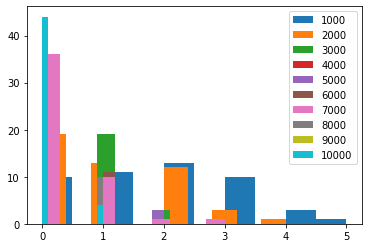

In [206]:
#look at your histograms
[plt.hist(x=ecdf(x)[0]) for x in spot_outcomes]
plt.legend(shoot_dils)

In [207]:
def one_zero (list_like):
    return [1 if x > 0 else 0 for x in list_like]

In [208]:
#let's make it look like my experimental outcomes that are binary

spot_outcomes_binary = [one_zero(x) for x in spot_outcomes]

In [209]:
#convert this to probability of an empty well

prob_empty = [1 - (sum(x)/len(x)) for x in spot_outcomes_binary]

In [210]:
#reconvert back up to the actual concentration to see how close you get
neg_ln_prob = [-np.log(x) for x in prob_empty]

In [211]:
results = [(x * sample_dil * convert_to_nl * shoot_dil) / (100) for x,shoot_dil in zip(neg_ln_prob, shoot_dils)]

In [212]:
#dummy y data
y_dum = [1 for x in results]

#colors
cvals = np.linspace(0,1,len(results))
cmap = cm.get_cmap('viridis')
colors = [cmap(x) for x in cvals]

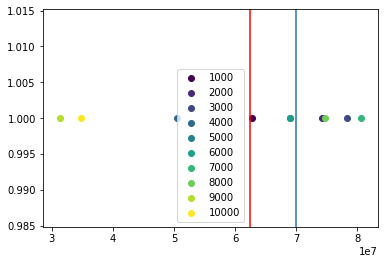

In [213]:
[plt.scatter(x=z[0], y=z[1], color=z[2]) for z in zip(results, y_dum, colors)]
plt.legend(shoot_dils)
plt.axvline(actual_density)
plt.axvline(np.array(results).mean(), color='r')


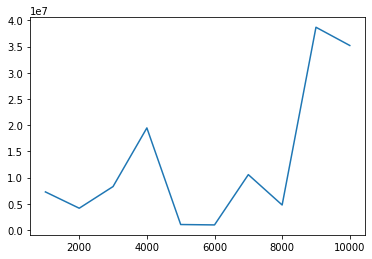

In [214]:
y = [abs(r - actual_density) for r in results]

plt.plot(shoot_dils, y)